Exercise 1<p>
    Consider the following data, where lines represent patterns and columns features:<p>
$X=\left[\begin{array}{ccc}7&4&3\\4&1&8\\6&3&5\\8&6&1\\8&5&7\\7&2&9\\5&3&3\\9&5&8\\7&4&5\\8&2&2\end{array}\right]$<p>

1-Standardize data (mean 0 and standard deviation 1).

In [1]:
import numpy as np
import statistics

X=np.array([[7,4,3],[4,1,8],[6,3,5],[8,6,1],[8,5,7],[7,2,9],[5,3,3],[9,5,8],[7,4,5],[8,2,2]])

#Standardize data
mu=np.mean(X,axis=0)
st=np.std(X,axis=0)
Xn=(X-mu)/st
print(Xn)

[[ 0.06917145  0.33333333 -0.78867155]
 [-2.00597195 -1.66666667  1.08911786]
 [-0.62254302 -0.33333333 -0.03755579]
 [ 0.76088591  1.66666667 -1.53978732]
 [ 0.76088591  1.          0.71355998]
 [ 0.06917145 -1.          1.46467574]
 [-1.31425748 -0.33333333 -0.78867155]
 [ 1.45260037  1.          1.08911786]
 [ 0.06917145  0.33333333 -0.03755579]
 [ 0.76088591 -1.         -1.16422944]]


2-Compute PCA by implementing explicitly the PCA algorithm and:<p>
• Identify the eigenvectors and eigenvalues;<p>
• identify the two most important ones and what is the % of variance explained by them.

In [2]:
#Compute Covariance matrix
C=np.cov(Xn.T)
print("C=\n"+str(C)+"\n")

#Compute eigenvalues and eigenvectors
eigVal,eigVec=np.linalg.eig(C)

#Order Eigenvalues in descending order and place eigenvectors accourdingly
ind = np.argsort(eigVal)
eigVal=eigVal[np.flip(ind)]
eigVec=eigVec[:,np.flip(ind)]

#Eigenvectors
print("Eigenvectors=\n"+str(eigVec))
#Eigenvalues
print("Eigenvalues="+str(eigVal)+"\n")
#Two must important--> Associated with the biggest eigenvalues
print("Two must important Eigenvectors=\n"+str(eigVec[:,0:2])+"\n")
#Compute variance explained by the two moust important PCs
print("Variance explained by the two moust important PCs:\nR(%)="+str((eigVal[0]**2+eigVal[1]**2)/(eigVal[0]**2+eigVal[1]**2+eigVal[2]**2)*100))



C=
[[ 1.11111111  0.74295257 -0.11257082]
 [ 0.74295257  1.11111111 -0.31991968]
 [-0.11257082 -0.31991968  1.11111111]]

Eigenvectors=
[[-0.64200458  0.38467229 -0.66321742]
 [-0.68636164  0.09713033  0.72074503]
 [ 0.34166917  0.91792861  0.20166619]]
Eigenvalues=[1.9653046  1.03008435 0.33794439]

Two must important Eigenvectors=
[[-0.64200458  0.38467229]
 [-0.68636164  0.09713033]
 [ 0.34166917  0.91792861]]

Variance explained by the two moust important PCs:
R(%)=97.73296633750905


Exercise 2<p>
    Inspect about the utility of projecting the datasets represented in the  figures bellow to one dimension by using PCA. Explain graphically your assumptions. (Implement explicitly the PCA algorithm!)
For your convenience these exemplary datasets are available at UCStudent
(dataset1.mat and dataset2.mat).<p>
<img src="dataset1.jpg" style="height:350px"> 
<img src="dataset2.jpg" style="height:350px">

In [3]:
import scipy.io as sio
import numpy as np
import plotly.express as px
data1 = sio.loadmat("/Users/cesarteixeira/Documents/AulasRepo/RP/RP25/Practical/PL3/data/dataset1.mat")

#================For Dataset 1=======================
X1=data1['data_2d'][0][0][0]
y1=data1['data_2d'][0][0][1][0]



#Normalize 
mu=np.mean(X1.T,axis=0)
st=np.std(X1.T,axis=0)
X1=(X1.T-mu)/st
X1=X1.T


#Compute covariance matrix
C=np.cov(X1)

#Compute Eigeinvalues and Eingenvectors
eigVal,W=np.linalg.eig(C)
print("Eigen Values="+str(eigVal)+"\n")
print("Sum Eigen Values="+str(np.sum(eigVal))+"\n")
print("Eigen Vectors=\n"+str(W))

#Plot original data
fig=px.scatter(x=X1[0,:],y=X1[1,:],color=y1,labels=dict(x="f1",y="f2",color="Class"))
fig.update_traces(marker_size=10)

#Angle between PC1 & the X axis
teta=np.arccos(np.dot(W[:,0],[1,0])/(np.linalg.norm(W[:,0])))

#Plot PC1
fig.add_annotation(
    x=eigVal[0]*np.cos(teta),  # arrows' head
    y=eigVal[0]*np.sin(teta),  # arrows' head
    ax=0,  # arrows' tail
    ay=0,  # arrows' tail
    xref='x',
    yref='y',
    axref='x',
    ayref='y',
    text='', 
    showarrow=True,
    arrowhead=4,
    arrowsize=2,
    arrowwidth=2,
    width=4,
    arrowcolor='black'
)


#Angle between PC2 & the X axis
teta=np.arccos(np.dot(W[:,1],[1,0])/(np.linalg.norm(W[:,1])))
#Plot PC2
fig.add_annotation(
    x=eigVal[1]*np.cos(teta),  # arrows' head
    y=eigVal[1]*np.sin(teta),  # arrows' head
    ax=0,  # arrows' tail
    ay=0,  # arrows' tail
    xref='x',
    yref='y',
    axref='x',
    ayref='y',
    text='', 
    showarrow=True,
    arrowhead=4,
    arrowsize=2,
    arrowwidth=2,
    width=4,
    arrowcolor='green'
)
fig.update_xaxes(range = [-4,4])
fig.update_yaxes(range = [-4,4])
fig.update_layout(
    autosize=False,
    width=600,
    height=600,
)
fig.show()


#Project data into the main PC
Xp=W[:,0]@X1

#Plot projected data
fig=px.scatter(x=Xp,y=np.zeros(np.shape(X1)[1]),color=y1,labels=dict(x="PC1",y="",color="Class"))
fig.update_traces(marker_size=5)
fig.show()




FileNotFoundError: [Errno 2] No such file or directory: '/Users/cesarteixeira/Documents/AulasRepo/RP/RP25/Practical/PL3/data/dataset1.mat'

Eigen Values=[1.61817873 0.38683381]

Sum Eigen Values=2.005012531328319

Eigen Vectors=
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


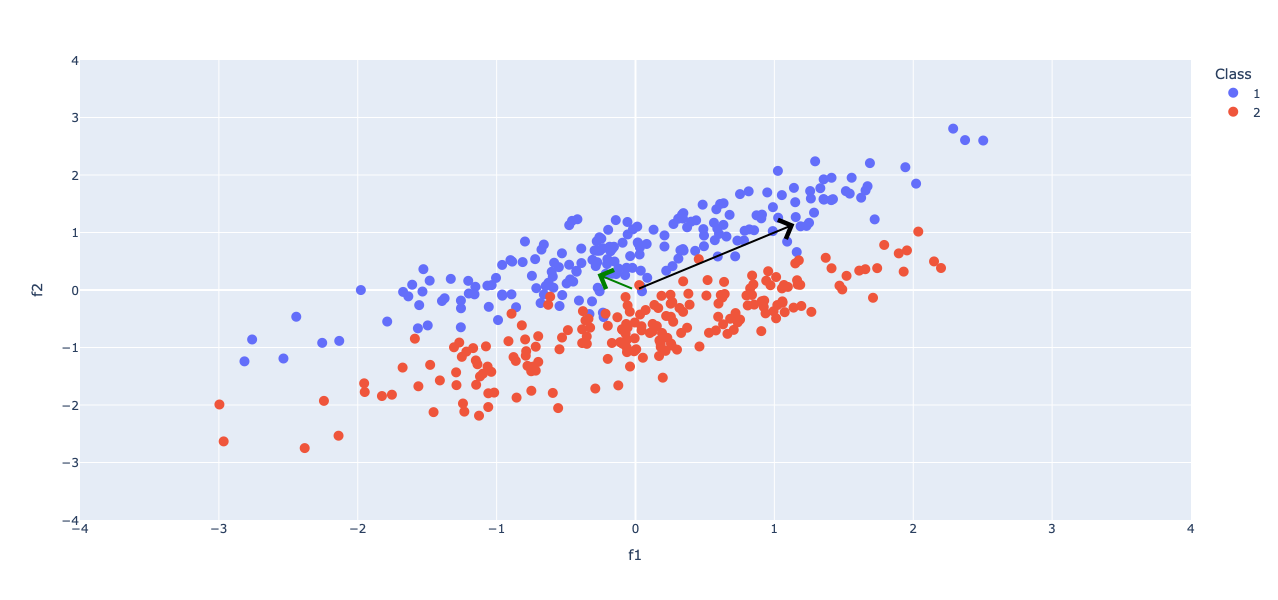

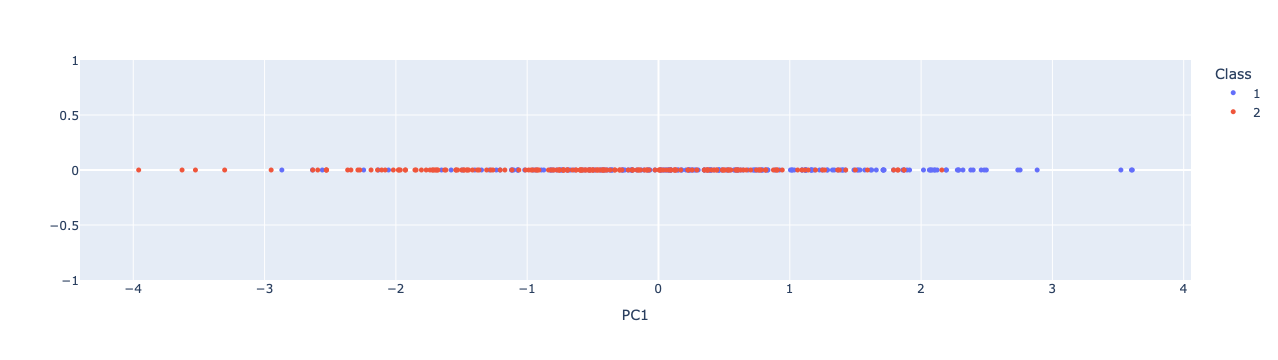

In [ ]:
import scipy.io as sio
import numpy as np
import plotly.express as px
data2 = sio.loadmat("/Users/cesarteixeira/Documents/AulasRepo/RP/RP25/Practical/PL3/data/dataset2.mat")
#================For Dataset 2=======================
X2=data2['data_2d'][0][0][0]
y2=data2['data_2d'][0][0][1][0]


#Normalize 
mu=np.mean(X2.T,axis=0)
st=np.std(X2.T,axis=0)
X2=(X2.T-mu)/st
X2=X2.T

#Compute covariance matrix
C=np.cov(X2)

#Compute Eigeinvalues and Eingenvectors
eigVal,W=np.linalg.eig(C)
print("Eigen Values="+str(eigVal)+"\n")
print("Sum Eigen Values="+str(np.sum(eigVal))+"\n")
print("Eigen Vectors=\n"+str(W))



#Plot original data & PCs
fig=px.scatter(x=X2[0,:],y=X2[1,:],color=y2,labels=dict(x="f1",y="f2",color="Class"))
fig.update_traces(marker_size=10)

#Angle between PC1 & the X axis
teta=np.arccos(np.dot(W[:,0],[1,0])/(np.linalg.norm(W[:,0])))
#Plot PC1
fig.add_annotation(
    x=eigVal[0]*np.cos(teta),  # arrows' head
    y=eigVal[0]*np.sin(teta),  # arrows' head
    ax=0,  # arrows' tail
    ay=0,  # arrows' tail
    xref='x',
    yref='y',
    axref='x',
    ayref='y',
    text='', 
    showarrow=True,
    arrowhead=4,
    arrowsize=2,
    arrowwidth=2,
    width=4,
    arrowcolor='black'
)


#Angle between PC2 & the X axis
teta=np.arccos(np.dot(W[:,1],[1,0])/(np.linalg.norm(W[:,1])))
#Plot PC2
fig.add_annotation(
    x=eigVal[1]*np.cos(teta),  # arrows' head
    y=eigVal[1]*np.sin(teta),  # arrows' head
    ax=0,  # arrows' tail
    ay=0,  # arrows' tail
    xref='x',
    yref='y',
    axref='x',
    ayref='y',
    text='', 
    showarrow=True,
    arrowhead=4,
    arrowsize=2,
    arrowwidth=2,
    width=4,
    arrowcolor='green'
)
fig.update_xaxes(range = [-4,4])
fig.update_yaxes(range = [-4,4])
fig.update_layout(
    autosize=False,
    width=600,
    height=600,
)

fig.show()


#Project data into the main PC
Xp=W[:,0]@X2

#Plot projected data
fig=px.scatter(x=Xp,y=np.zeros(np.shape(X2)[1]),color=y2,labels=dict(x="PC1",y="",color="Class"))
fig.update_traces(marker_size=5)
fig.show()


Exercise 3<p>
    Consider the cork stoppers.xls data set containing measurements performed automatically by an image processing system on 150 cork stoppers belonging to three classes ($\omega_1$ - Super, $\omega_2$ - Average and $\omega_3$ - Poor)


In [ ]:
import numpy as np
import plotly.express as px
import pandas as pd


Labels=["Super","Average","Poor"]        
xlsFile=pd.read_excel("/Users/cesarteixeira/Documents/AulasRepo/ML/Datasets/CORK_STOPPERS.XLS",
                      sheet_name="Data",
                      usecols=["C","ART","N.1","PRT","ARM","PRM","ARTG","NG","PRTG","RAAR","RAN"])
CorkStopp=pd.DataFrame(data=xlsFile.dropna())

ixSuper=np.where(CorkStopp['C']==1)
ixAverage=np.where(CorkStopp['C']==2)
ixPoor=np.where(CorkStopp['C']==3)

CorkStopp['C'].iloc[ixSuper]=Labels[0]
CorkStopp['C'].iloc[ixAverage]=Labels[1]
CorkStopp['C'].iloc[ixPoor]=Labels[2]



X=CorkStopp.to_numpy()[:,1:]
y=CorkStopp.to_numpy()[:,0]
X=X.astype(float)
#Normalize
X=(X-np.mean(X,axis=0))/np.std(X,axis=0)

/Users/cesarteixeira/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1. Find the directions of the Principal Components and the variance explained by each one. (Use PCA from sklearn.decomposition!)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
#PCA eigenvalues/Explained variance
print("PCA eigenvalues/Explained variance")
print(pca.explained_variance_)
print("Sum of eigenvalues="+str(np.sum(pca.explained_variance_)))
#PCA eigenvectors/Principal components
print("PCA eigenvectors/Principal components")
W=pca.components_.T
print(W)

PCA eigenvalues/Explained variance
[8.68304193e+00 8.28321671e-01 2.28702836e-01 1.81187756e-01
 1.14542377e-01 1.74952231e-02 6.71602166e-03 3.60049762e-03
 3.05741225e-03 4.48366335e-04]
Sum of eigenvalues=10.067114093959722
PCA eigenvectors/Principal components
[[ 0.33449215 -0.13098008  0.22166984 -0.1228833   0.1826393   0.17567229
  -0.53089238  0.37896229 -0.2072576   0.52353479]
 [ 0.25284875 -0.71945523  0.10337955 -0.06708083 -0.39158559  0.25978988
   0.29173971 -0.22006525  0.14967394  0.16276177]
 [ 0.32406903 -0.30590743  0.23434613 -0.08758557 -0.00085182 -0.38713626
  -0.08097712  0.29505014 -0.23701241 -0.66268288]
 [ 0.30906212  0.40402312  0.33168879 -0.22669819 -0.10984489  0.57274739
  -0.1555779  -0.24979596  0.14077337 -0.36511818]
 [ 0.31286536  0.35123782  0.40334283 -0.18016432 -0.21668677 -0.56089872
   0.25803729 -0.13924878  0.12017409  0.34875038]
 [ 0.33053296  0.03489569  0.08148695  0.36286679  0.5033286   0.15478628
   0.44935288  0.33798735  0.3970420

Plot the eigenvalues. Use Kaiser test and the Scree test to decide how many components (and corresponding variances) to retain.

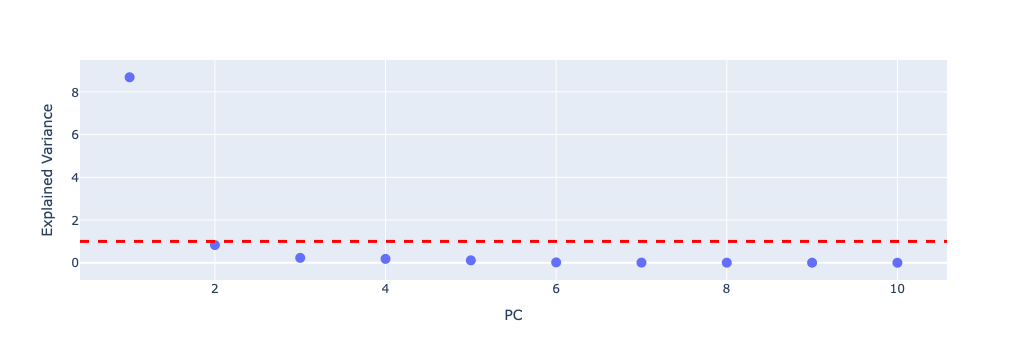

In [ ]:
fig = px.scatter(x=np.arange(1,11,1), y=pca.explained_variance_,
                 labels=dict(x="PC",y="Explained Variance"))
fig.add_hline(y=1,line_width=3, line_dash="dash", line_color="red")
fig.update_traces(marker_size=10)
fig.show()

Accourding to Kaiser, one PC is enough. Accourding to Scree we can subjectively say that the eighenvalue plot is constant after 6 PCs.

In [ ]:
print("Variance (%) retained accourding to Kaiser: "+str(pca.explained_variance_[0]**2/(np.sum(pca.explained_variance_**2))*100))
print("Variance (%) retained accourding to Scree: "+str(np.sum(pca.explained_variance_[0:6]**2)/(np.sum(pca.explained_variance_**2))*100))

Variance (%) retained accourding to Kaiser: 98.96988076588062
Variance (%) retained accourding to Scree: 99.9999112400026


Plot projected data accourding to the Kaiser criterion.

(150, 1)


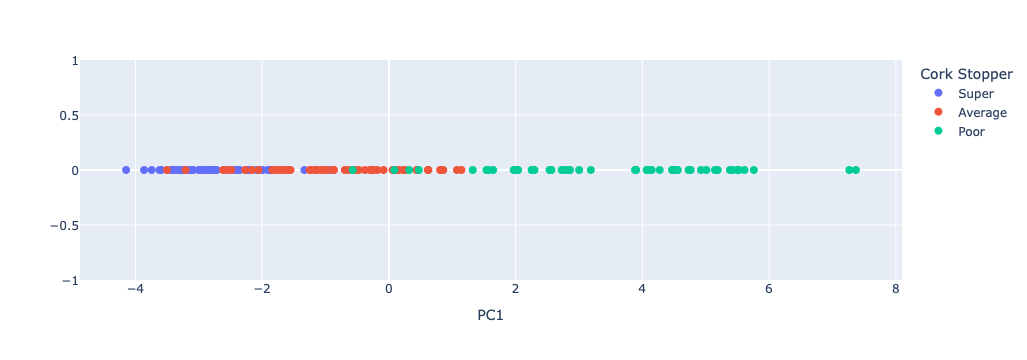

In [ ]:
pca2=PCA(n_components=1)

X1D=pca2.fit_transform(X)
print(np.shape(X1D))

#Plot projected data
fig=px.scatter(x=X1D[:,0],y=np.zeros(np.shape(X1D)[0]),color=CorkStopp['C'],labels=dict(x="PC1",y="",color="Cork Stopper"))
fig.update_traces(marker_size=8)
fig.update_xaxes
fig.show()



Exercise 4<p>
    Inspect about the utility of projecting the datasets represented in the  figures bellow to one dimension by using LDA. Explain graphically your assumptions.
For your convenience these examplary datasets are available at UCStudent
(dataset1.mat and dataset2.mat).<p>
<img src="dataset1.jpg" style="height:350px"> 
<img src="dataset2.jpg" style="height:350px">

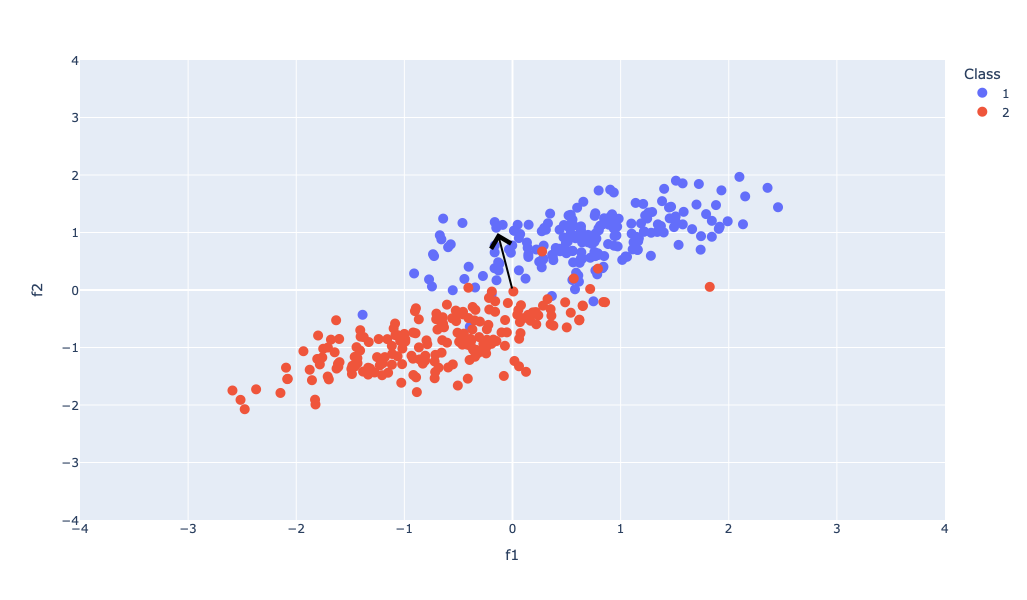

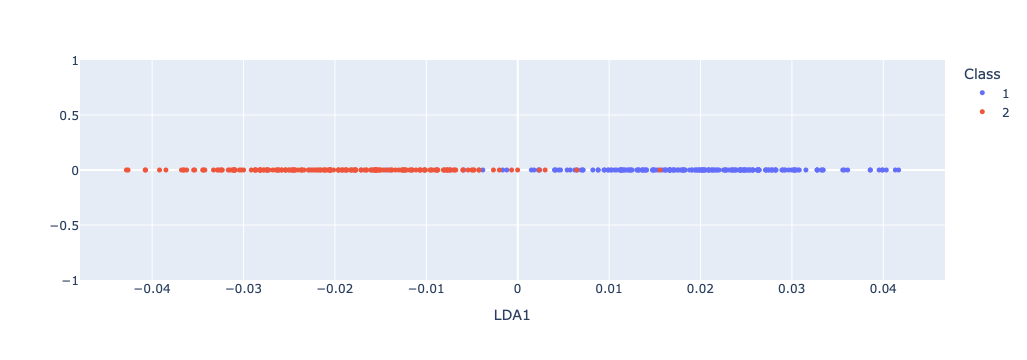

In [ ]:
import scipy.io as sio
import numpy as np
import plotly.express as px
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


data1 = sio.loadmat("/Users/cesarteixeira/Documents/AulasRepo/RP/RP25/Practical/PL3/data/dataset1.mat")

#================For Dataset 1=======================
X1=data1['data_2d'][0][0][0]
y1=data1['data_2d'][0][0][1][0]



#Normalize 
mu=np.mean(X1.T,axis=0)
st=np.std(X1.T,axis=0)
X1=(X1.T-mu)/st
X1=X1.T

#Find class 1 & 2 samples
ixw1=np.where(y1==1)[0]
ixw2=np.where(y1==2)[0]

#Compute means for the different classes
mu1=np.array([np.mean(X1[:,ixw1],axis=1)]).T
mu2=np.array([np.mean(X1[:,ixw2],axis=1)]).T

#Compute within scatter matrices
S1=(X1[:,ixw1]-mu1)@(X1[:,ixw1]-mu1).T
S2=(X1[:,ixw2]-mu2)@(X1[:,ixw2]-mu2).T

#Compute within scatter matrix and its inverse
Sw=S1+S2
Swi=np.linalg.inv(Sw)

#Compute w
w=Swi@(mu1-mu2)

#Plot original data
fig=px.scatter(x=X1[0,:],y=X1[1,:],color=y1,labels=dict(x="f1",y="f2",color="Class"))
fig.update_traces(marker_size=10)

#Angle between LDA1 & the X axis
teta=np.arccos(np.dot(w.squeeze(),[1,0])/(np.linalg.norm(w)))
#Plot LDA1
fig.add_annotation(
    x=np.cos(teta),  # arrows' head
    y=np.sin(teta),  # arrows' head
    ax=0,  # arrows' tail
    ay=0,  # arrows' tail
    xref='x',
    yref='y',
    axref='x',
    ayref='y',
    text='', 
    showarrow=True,
    arrowhead=4,
    arrowsize=2,
    arrowwidth=2,
    width=4,
    arrowcolor='black'
)



fig.update_xaxes(range = [-4,4])
fig.update_yaxes(range = [-4,4])
fig.update_layout(
    autosize=False,
    width=600,
    height=600,
)
fig.show()


#Project data acourding to LDA
# apply transform to dataset
Xp = w.T@X1
#Plot projected data
fig=px.scatter(x=Xp.squeeze(),y=np.zeros(np.shape(Xp.squeeze())[0]),color=y1,labels=dict(x="LDA1",y="",color="Class"))
fig.update_traces(marker_size=5)
fig.show()

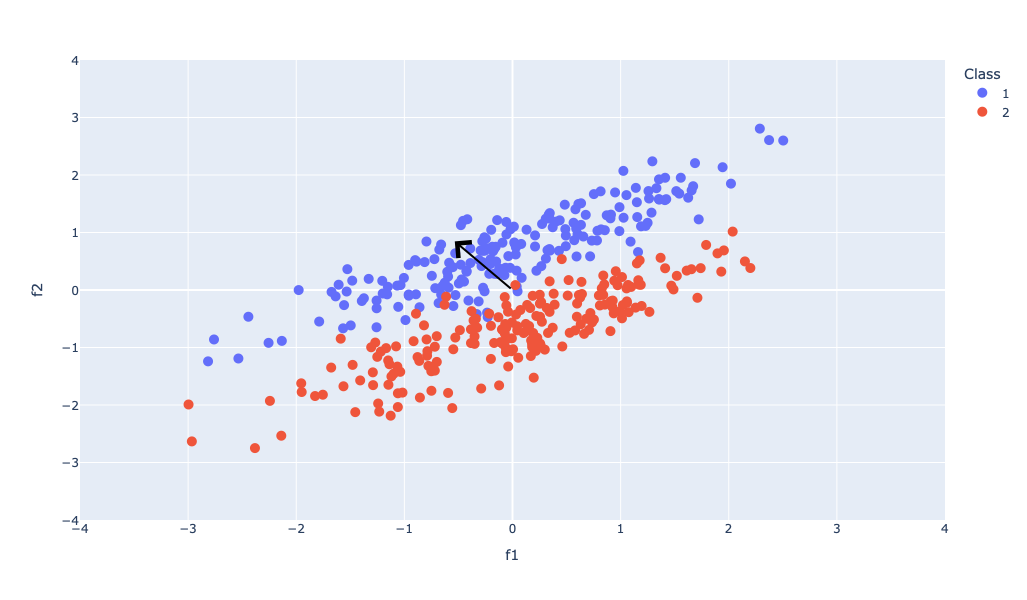

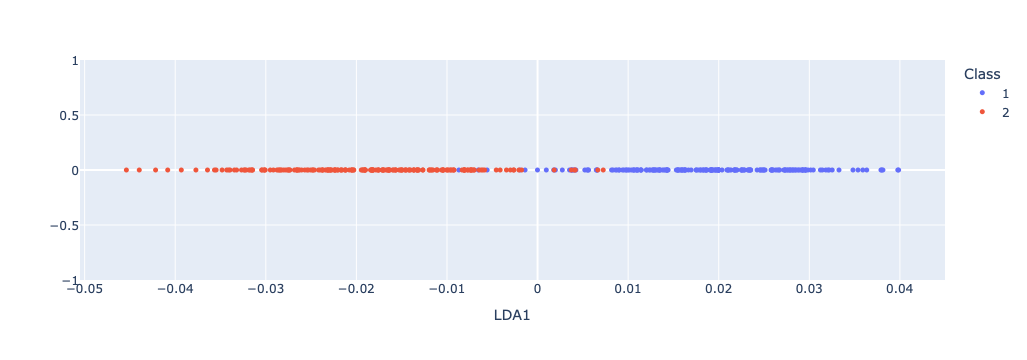

In [ ]:
data1 = sio.loadmat("/Users/cesarteixeira/Documents/AulasRepo/RP/RP25/Practical/PL3/data/dataset2.mat")
#================For Dataset 2=======================
X1=data1['data_2d'][0][0][0]
y1=data1['data_2d'][0][0][1][0]



#Normalize 
mu=np.mean(X1.T,axis=0)
st=np.std(X1.T,axis=0)
X1=(X1.T-mu)/st
X1=X1.T

#Find class 1 & 2 samples
ixw1=np.where(y1==1)[0]
ixw2=np.where(y1==2)[0]

#Compute means for the different classes
mu1=np.array([np.mean(X1[:,ixw1],axis=1)]).T
mu2=np.array([np.mean(X1[:,ixw2],axis=1)]).T

#Compute within scatter matrices
S1=(X1[:,ixw1]-mu1)@(X1[:,ixw1]-mu1).T
S2=(X1[:,ixw2]-mu2)@(X1[:,ixw2]-mu2).T

#Compute within scatter matrix and its inverse
Sw=S1+S2
Swi=np.linalg.inv(Sw)

#Compute w
w=Swi@(mu1-mu2)

#Plot original data
fig=px.scatter(x=X1[0,:],y=X1[1,:],color=y1,labels=dict(x="f1",y="f2",color="Class"))
fig.update_traces(marker_size=10)

#Angle between LDA1 & the X axis
teta=np.arccos(np.dot(w.squeeze(),[1,0])/(np.linalg.norm(w)))
#Plot LDA1
fig.add_annotation(
    x=np.cos(teta),  # arrows' head
    y=np.sin(teta),  # arrows' head
    ax=0,  # arrows' tail
    ay=0,  # arrows' tail
    xref='x',
    yref='y',
    axref='x',
    ayref='y',
    text='', 
    showarrow=True,
    arrowhead=4,
    arrowsize=2,
    arrowwidth=2,
    width=4,
    arrowcolor='black'
)



fig.update_xaxes(range = [-4,4])
fig.update_yaxes(range = [-4,4])
fig.update_layout(
    autosize=False,
    width=600,
    height=600,
)
fig.show()


#Project data acourding to LDA
# apply transform to dataset
Xp = w.T@X1

#Plot projected data
fig=px.scatter(x=Xp.squeeze(),y=np.zeros(np.shape(Xp.squeeze())[0]),color=y1,labels=dict(x="LDA1",y="",color="Class"))
fig.update_traces(marker_size=5)
fig.show()

Exercise 5<p>
    Project the Corkstoppers dataset using LDA. Consider the maximum possible dimensionality for the projection. (Use LinearDiscriminantAnalysis from sklearn.discriminant_analysis)

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import plotly.express as px
import pandas as pd


Labels=["Super","Average","Poor"]        
xlsFile=pd.read_excel("CORK_STOPPERS.XLS",
                      sheet_name="Data",
                      usecols=["C","ART","N.1","PRT","ARM","PRM","ARTG","NG","PRTG","RAAR","RAN"])
CorkStopp=pd.DataFrame(data=xlsFile.dropna())

ixSuper=np.where(CorkStopp['C']==1)
ixAverage=np.where(CorkStopp['C']==2)
ixPoor=np.where(CorkStopp['C']==3)

CorkStopp['C'].iloc[ixSuper]=Labels[0]
CorkStopp['C'].iloc[ixAverage]=Labels[1]
CorkStopp['C'].iloc[ixPoor]=Labels[2]



X=CorkStopp.to_numpy()[:,1:]
y=CorkStopp.to_numpy()[:,0]
X=X.astype(float)
#Normalize
X=(X-np.mean(X,axis=0))/np.std(X,axis=0)


lda = LinearDiscriminantAnalysis()
# prepare transform on dataset
lda.fit(X,y)
# apply transform to dataset
transformed = lda.transform(X)
print(transformed.shape)
#Plot transformed data
fig=px.scatter(x=transformed[:,0],y=transformed[:,1],color=y,labels=dict(x="LDA1",y="LDA2",color="Class"))
fig.update_traces(marker_size=10)


(150, 2)
